In [573]:
#Import library yang diperlukan
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder


#1. Menggunakan dataset “Used Cars Price Prediction”

In [574]:
# Load dataset Used Cars Price Prediction
!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

--2025-10-07 09:49:05--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv.20’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.03s   

2025-10-07 09:49:05 (19.1 MB/s) - ‘used_cars_price_fiks.csv.20’ saved [602640/602640]



file csv akan di download dan disimpan di file google collab

#2. Melakukan tahap preprocessing

## Profiling Data atau Preparation Data

In [575]:
# Menyimpan ke dalam variabel dataset
df = pd.read_csv('/content/used_cars_price_fiks.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


membaca file csv di file google colab

In [576]:
#Menghapus unnamed
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

menghapus unnamed karena hanya default dari csv (tidak dipakai)

In [577]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  5719 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 564.4+ KB


In [578]:
# Menampilkan nilai statistika deskriptif setiap variabel dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,5719.0,57545.592586,37988.496154,171.00,33923.00,53000.00,72998.00,775000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


##Exploratory Data Analysis (EDA)

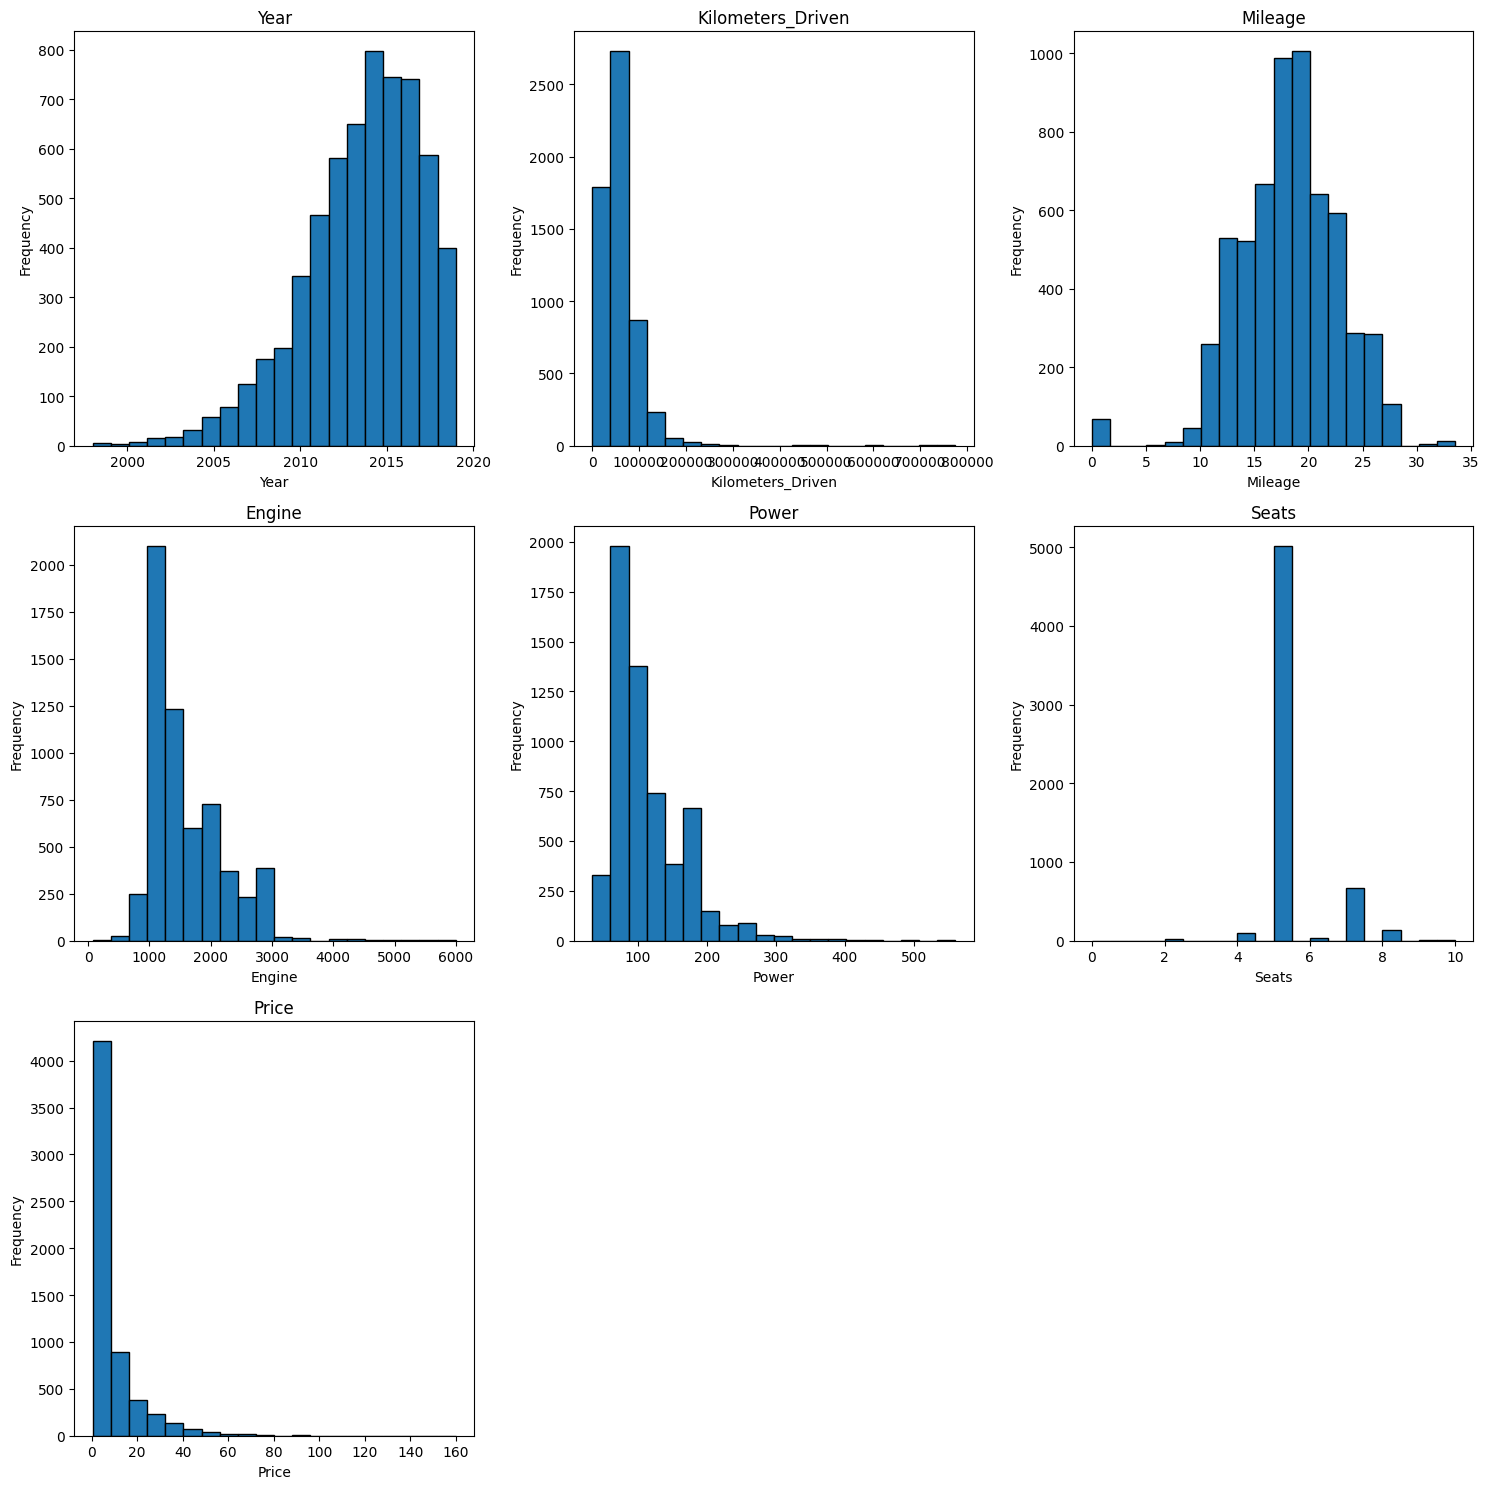

In [579]:
# Cek distribusi data numerik pada dataset dengan histogram
numeric_col = df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(numeric_col) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()
for i, col in enumerate(numeric_col):
    ax = axes[i]
    ax.hist(df[col], bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

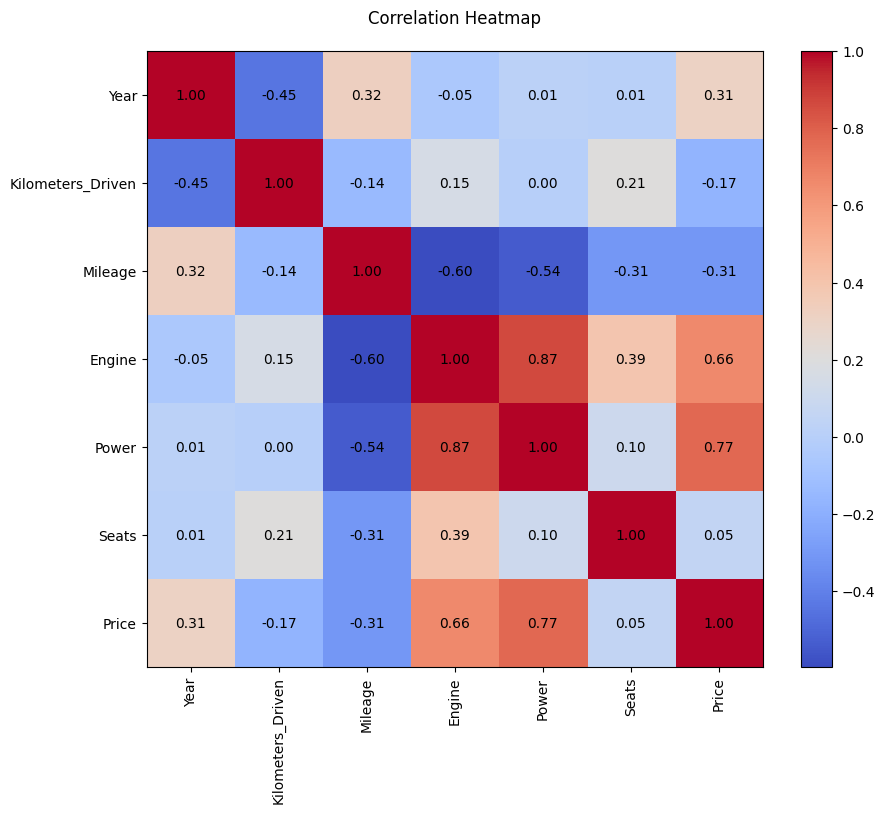

In [580]:
# Cek korelasi antar data numerik dengan heatmap
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Label sumbu
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.title("Correlation Heatmap", pad=20)
plt.show()

##Data Cleaning

In [581]:
# Buat salinan data untuk preprocessing
df_clean = df.copy()

In [582]:
# Cek nilai Null pada dataset
df_clean.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,300
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,143


mengecek nilai yang kosong di dataset

In [583]:
#Hapus Nilai Null
df_clean.dropna(inplace=True)

# Cek nilai Null pada dataset setelah penghapusan null
df_clean.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


menghapus semua nilai yang kosong

In [584]:
# Cek duplikasi dataset
df_clean.duplicated().sum()

np.int64(0)

mengecek redudansi dataset, karena tidak ada duplikasi, bisa lanjut

In [585]:
# Menghapus kolom ID atau kolom yang tidak memiliki nilai untuk model
df_clean.drop(['Name'], axis=1, inplace=True)
df_clean.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

menghapus kolom yang tidak punya value di dataset

In [586]:
# Buat salinan data untuk menghapus outliers
df_outlier = df_clean.copy()

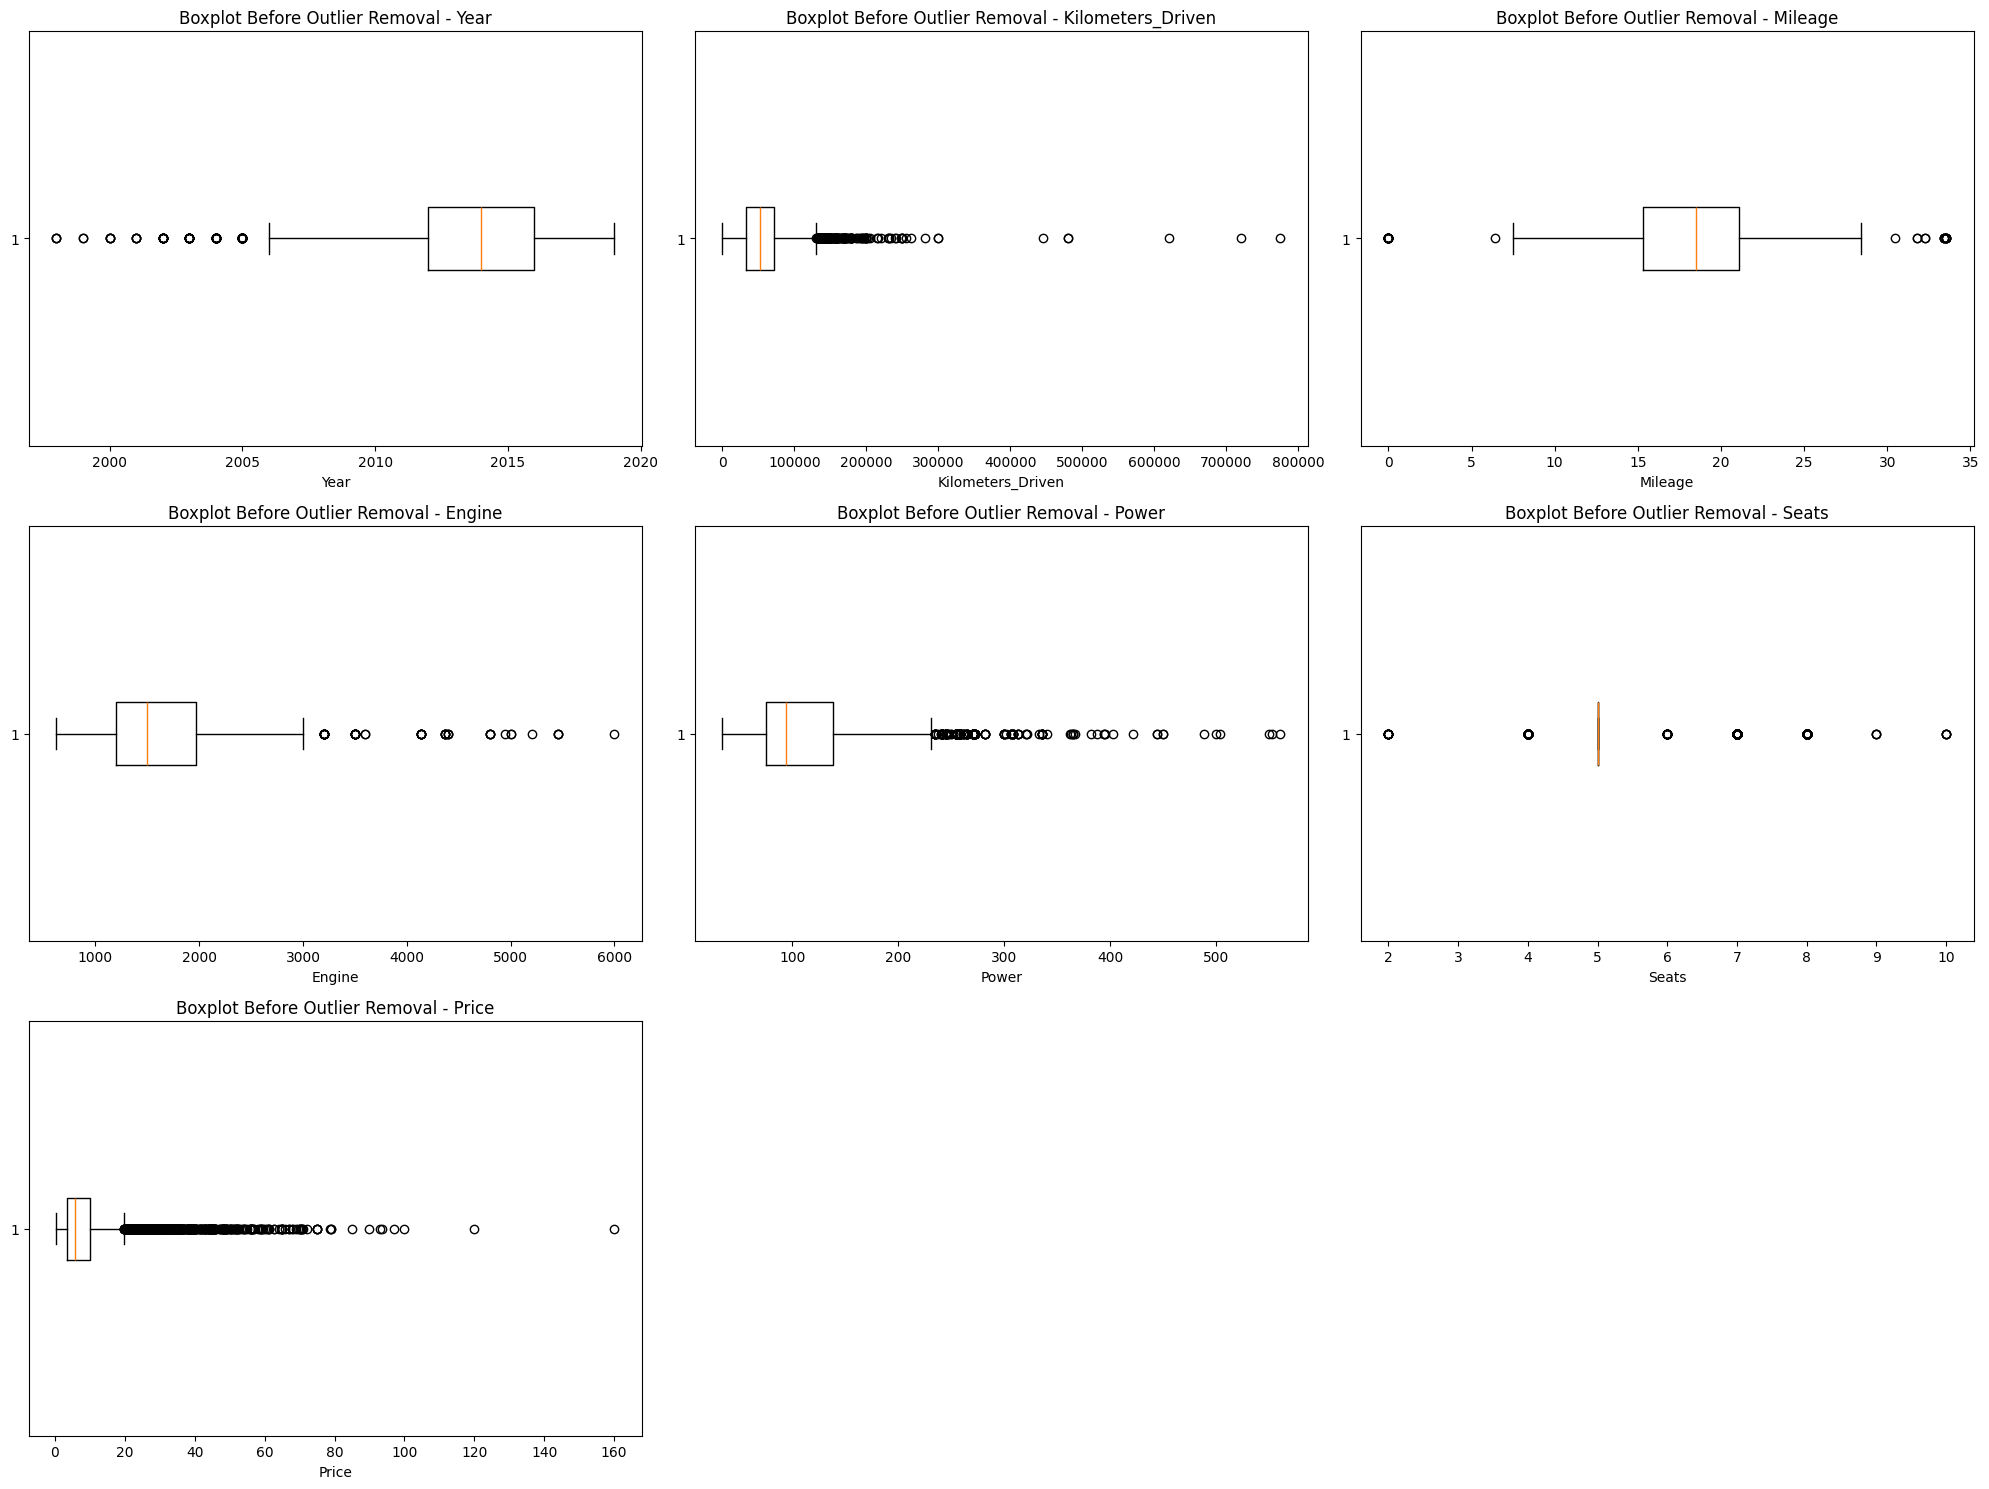

In [587]:
# Cek boxplot sebelum diatasi outliernya
num_cols = df_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

visualisasi outlier per kolom

In [588]:
# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier = df[(df < lower_bound) | (df > upper_bound)]
    return df_outlier

# Hitung jumlah outlier tiap kolom dan simpan dalam dictionary
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers_iqr(df_outlier[col])
    outlier_counts[col] = len(outliers)

# Buat DataFrame dari dictionary
outlier_summary_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Tampilkan hasilnya
print("Jumlah outlier per kolom (IQR method):")
display(outlier_summary_df)

Jumlah outlier per kolom (IQR method):


,Outlier Count
Year,103
Kilometers_Driven,184
Mileage,42
Engine,54
Power,223
Seats,893
Price,671


mengecek outlier yang ada di dalam dataset

In [589]:
# Hapus outlier dari semua kolom numerik
def remove_outliers_iqr(df, columns):
  df_no_outlier = df.copy()

  Q1 = df_no_outlier[columns].quantile(0.25)
  Q3 = df_no_outlier[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outlier_filters = ~((df_no_outlier[columns] < lower) | (df_no_outlier[columns] > upper)).any(axis=1)
  df_no_outlier = df_no_outlier[outlier_filters]
  return df_no_outlier

df_no_outlier = remove_outliers_iqr(df_outlier, num_cols)

print("Jumlah data sebelum hapus outlier: ", len(df_outlier))
print("Jumlah data setelah hapus outlier: ", len(df_no_outlier))
print("Total data yang dihapus: ", len(df_outlier) - len(df_no_outlier))
print("Persentase data yang dihapus: ", round((len(df_outlier) - len(df_no_outlier)) / len(df_outlier) * 100, 2), "%")

Jumlah data sebelum hapus outlier:  5582
Jumlah data setelah hapus outlier:  3976
Total data yang dihapus:  1606
Persentase data yang dihapus:  28.77 %


menghapus semua outlier yang terdeteksi, total 28,77% data yang dihapus merupakan outlier

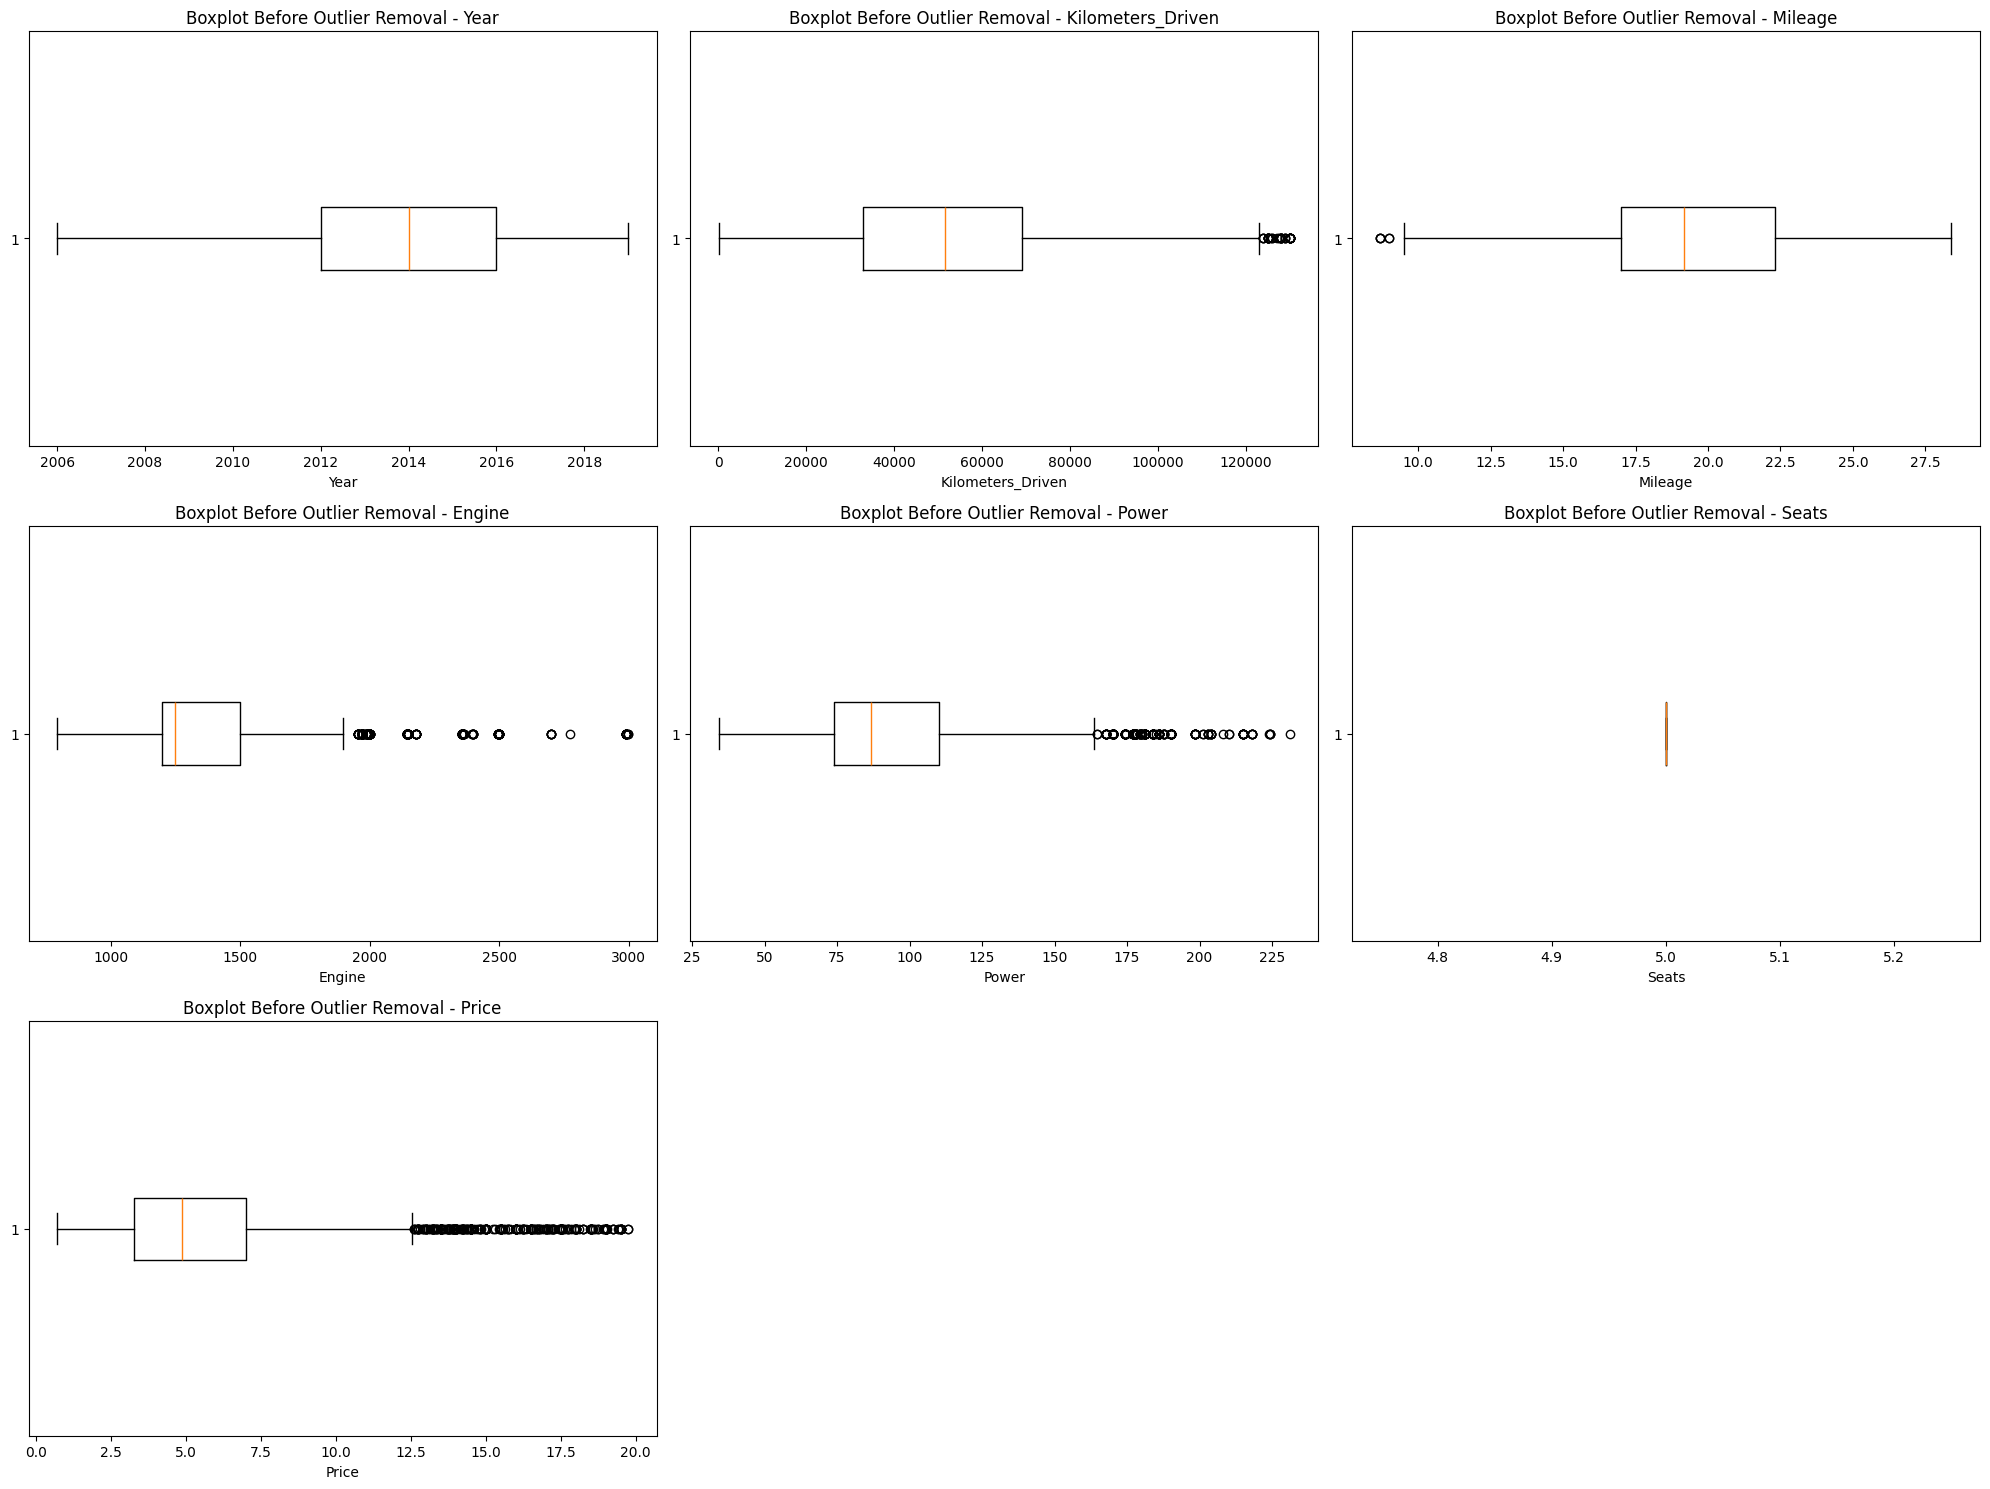

In [590]:
# Cek boxplot setelah diatasi outliernya
num_cols = df_no_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_no_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

visualisasi outlier perkolom, yang masih tersisa berarti ga terlalu melenceng dari garis

##Data Transformations (Catatan: Data Scaling dilakukan di tahap modelling)

In [591]:
# Buat salinan terlebih dahulu
df_en = df_no_outlier.copy()

# Cek tipe data kolom dataset
df_en.dtypes

,0
Location,object
Year,int64
Kilometers_Driven,float64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64
Power,float64
Seats,float64


In [592]:
# Ubah kolom-kolom kategorik (object) menjadi numerik
label_en = LabelEncoder()
df_en['Location'] = label_en.fit_transform(df_en['Location'])
df_en['Fuel_Type'] = label_en.fit_transform(df_en['Fuel_Type'])
df_en['Transmission'] = label_en.fit_transform(df_en['Transmission'])
df_en['Owner_Type'] = label_en.fit_transform(df_en['Owner_Type'])

In [593]:
# Cek dataset setelah di-label encoder
df_en

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,2010,72000.0,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,2015,41000.0,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,2011,46000.0,3,1,0,18.20,1199.0,88.70,5.0,4.50
4,3,2013,40670.0,1,0,2,15.20,1968.0,140.80,5.0,17.74
5,5,2012,75000.0,2,1,0,21.10,814.0,55.20,5.0,2.35
...,...,...,...,...,...,...,...,...,...,...,...
6013,3,2015,70602.0,1,1,0,25.80,1498.0,98.60,5.0,4.83
6014,4,2014,27365.0,1,1,0,28.40,1248.0,74.00,5.0,4.75
6015,6,2015,100000.0,1,1,0,24.40,1120.0,71.00,5.0,4.00
6017,8,2013,46000.0,3,1,0,18.90,998.0,67.10,5.0,2.65


mengubah semua tipe data object menjadi numerik

##Data Final (Pengecekan ulang data setelah di-preprocessing)

In [594]:
df_final = df_en.copy()
df_final.info()
df_final.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 3976 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           3976 non-null   int64  
 1   Year               3976 non-null   int64  
 2   Kilometers_Driven  3976 non-null   float64
 3   Fuel_Type          3976 non-null   int64  
 4   Transmission       3976 non-null   int64  
 5   Owner_Type         3976 non-null   int64  
 6   Mileage            3976 non-null   float64
 7   Engine             3976 non-null   float64
 8   Power              3976 non-null   float64
 9   Seats              3976 non-null   float64
 10  Price              3976 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 372.8 KB


,count,mean,std,min,25%,50%,75%,max
Location,3976.0,5.738179,2.932895,0.00,3.00,6.000,8.00,10.00
Year,3976.0,2013.549799,2.868881,2006.00,2012.00,2014.000,2016.00,2019.00
Kilometers_Driven,3976.0,52354.933602,25913.047783,171.00,33000.00,51515.000,69000.00,130002.00
Fuel_Type,3976.0,2.119467,1.005426,0.00,1.00,3.000,3.00,3.00
Transmission,3976.0,0.798793,0.400953,0.00,1.00,1.000,1.00,1.00
Owner_Type,3976.0,0.345070,0.781639,0.00,0.00,0.000,0.00,3.00
Mileage,3976.0,19.538589,3.704577,8.70,17.00,19.160,22.32,28.40
Engine,3976.0,1387.943159,342.176139,793.00,1197.00,1248.000,1498.00,2997.00
Power,3976.0,95.741620,32.814666,34.20,74.00,86.700,110.00,231.10
Seats,3976.0,5.000000,0.000000,5.00,5.00,5.000,5.00,5.00


hasil akhir setelah proses preprocessing

#Feature Selection (Forward selection)

In [595]:
# Memisahkan fitur (X) dan target (y)
X = df_final.drop('Price', axis=1)
y = df_final['Price']

# Mendefinisikan Sequential Forward Selection (SFS) dari mlxtend
sfs = SequentialFeatureSelector(LinearRegression(),
                                k_features=5,
                                forward=True,
                                scoring='r2',
                                cv=0)

# Menjalankan SFS untuk menyeleksi 5 fitur/kolom utama
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

In [596]:
# Ambil nama fitur yang terpilih dari hasil SFS
selected_feature_names = list(sfs.k_feature_names_)
print("\nFitur terpilih oleh SFS:", selected_feature_names)

# Buat DataFrame X_final dengan memfilter DataFrame asli
X_final = X[selected_feature_names]
X_final


Fitur terpilih oleh SFS: ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Power']


,Location,Year,Fuel_Type,Transmission,Power
0,9,2010,0,1,58.16
1,10,2015,1,1,126.20
2,2,2011,3,1,88.70
4,3,2013,1,0,140.80
5,5,2012,2,1,55.20
...,...,...,...,...,...
6013,3,2015,1,1,98.60
6014,4,2014,1,1,74.00
6015,6,2015,1,1,71.00
6017,8,2013,3,1,67.10


sfs memilih fitur terbaik yang ada di dataset yang berpengaruh pada price, saya tentukan menjadi 5 fitur yang akan dipakai.

#3. Melakukan tahap modelling

In [597]:
y_final = y

# Split dataset ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Cek data masing-masing
print("Jumlah data latih:", X_train.shape)
print("Jumlah data uji:", X_test.shape)

Jumlah data latih: (3180, 5)
Jumlah data uji: (796, 5)


Dataset dibagi menjadi dua bagian, yaitu data latih (80%) dan data uji (20%).

In [598]:
# Menggunakan z-score atau standard scaler
scaler = StandardScaler()

# fit_transform data latih
X_train_scaled = scaler.fit_transform(X_train)

# transform data uji
X_test_scaled = scaler.transform(X_test)

# Cek scaling
print("data latih :")
print(X_train_scaled)
print("\ndata uji :")
print(X_test_scaled)

data latih :
[[-0.25005286 -1.242861   -2.11139349  0.49360399 -0.0538009 ]
 [-1.61985146 -0.18910221  0.87226729  0.49360399 -0.29706607]
 [-0.93495216  1.56716245  0.87226729 -2.02591556 -0.38020733]
 ...
 [ 0.43484644  0.51340365  0.87226729  0.49360399 -0.13386285]
 [ 0.43484644  1.56716245 -1.1168399   0.49360399 -0.66134797]
 [ 1.4621954  -0.54035514 -1.1168399   0.49360399  0.2510504 ]]

data uji :
[[-0.25005286 -0.54035514 -1.1168399   0.49360399 -0.66350349]
 [ 0.7772961   0.51340365  0.87226729  0.49360399 -0.47566582]
 [ 1.11974575 -0.89160807  0.87226729 -2.02591556 -0.50953819]
 ...
 [ 1.11974575 -0.89160807 -1.1168399  -2.02591556  3.31188056]
 [-0.59250251 -0.18910221  0.87226729  0.49360399 -0.26627301]
 [-0.93495216  1.21590952 -1.1168399   0.49360399  0.94697355]]


mengubah nilai setiap fitur menjadi rata-rata 0 dan standar deviasi 1.untuk memastikan tidak ada fitur yang mendominasi proses pembelajaran model hanya karena memiliki skala nilai yang lebih besar

In [599]:
# Modelling dengan model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

**Rumus Coefficient:**

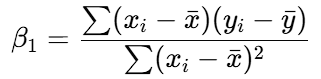

Keterangan:


*   β₁ = Coefficient atau Kemiringan regresi, yang menunjukkan perubahan rata-rata pada Y untuk setiap satu unit perubahan pada X
*   xi = Data x (prediktor) ke-i
*   x̄ = Rata-rata data x
*   yi = Data y (target) ke-i
*   ȳ = Rata-rata data y





**Rumus Intercept:**

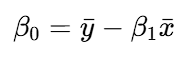

Keterangan:



*    β₀ = Intercept atau konstanta titik potong garis regresi dengan sumbu Y (nilai Y saat X = 0)
*   ȳ = Rata-rata data y
*   β₁ = Coefficient atau Kemiringan regresi, yang menunjukkan perubahan rata-rata pada Y untuk setiap satu unit perubahan pada X
*   x̄ = Rata-rata data x




In [600]:
# Cek parameter model
print("Intercept:", model_lr.intercept_)
print("Coefficient:", model_lr.coef_)

Intercept: 5.7313553459119415
Coefficient: [-0.31268819  1.59514265 -0.50825831 -0.62617813  2.28611289]


#4. Melakukan tahap evaluasi model

In [601]:
# Evaluasi model dengan metrik evaluasi regresi (R2, MAE, MSE, RMSE)
# y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test_scaled)

# Membuat dataframe untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Mengurutkan index
comparison_df = comparison_df.sort_index()
# Mereset index
comparison_df = comparison_df.reset_index(drop=True)
# Tampilkan hasil
comparison_df

,Actual,Predicted
0,5.20,5.804988
1,9.95,7.892101
2,6.34,5.292677
3,8.25,6.826319
4,4.25,5.234823
...,...,...
791,8.30,8.551788
792,3.25,3.773451
793,2.75,3.236097
794,3.20,4.253828


Model yang sudah dilatih dipakai untuk memprediksi data uji. Hasil prediksi dibandingkan dengan nilai harga asli

In [602]:
# Hitung metrik evaluasi
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)

# Membuat dataframe nilai evaluasi
score = pd.DataFrame({
    'Metrik': ['R2', 'MAE', 'MSE', 'RMSE'],
    'Nilai': [r2_test, mae_test, mse_test, rmse_test]
})

score

,Metrik,Nilai
0,R2,0.740383
1,MAE,1.378174
2,MSE,3.788785
3,RMSE,1.946480


R2 (R-squared): Menunjukkan seberapa besar variasi harga yang bisa dijelaskan oleh model. Nilainya sekitar 0.74, artinya model bisa menjelaskan sekitar 74% variasi harga mobil.

MAE (Mean Absolute Error): Rata-rata selisih absolut antara harga asli dan prediksi.

MSE (Mean Squared Error): Rata-rata dari kuadrat selisih.

RMSE (Root Mean Squared Error): Akar dari MSE, memberikan gambaran error dalam satuan yang sama dengan harga.

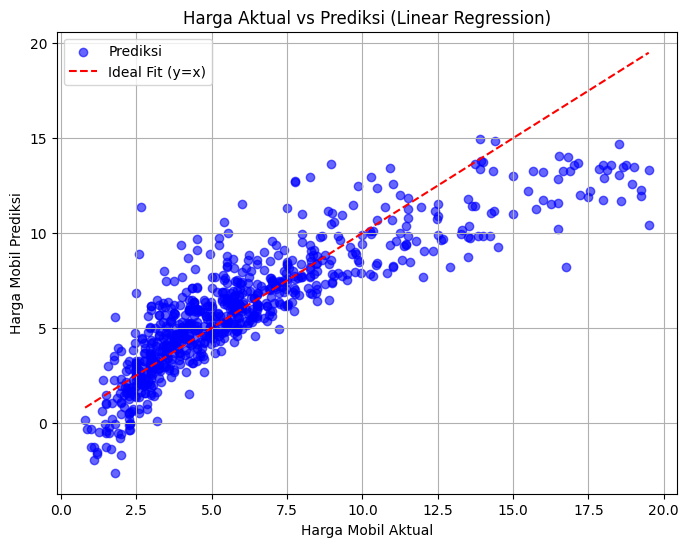

In [603]:
# Scatter plot untuk hasil prediksi regresi linear
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label="Prediksi")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', label="Ideal Fit (y=x)")
plt.xlabel('Harga Mobil Aktual')
plt.ylabel('Harga Mobil Prediksi')
plt.title('Harga Aktual vs Prediksi (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

Sumbu X: Harga mobil aktual.

Sumbu Y: Harga mobil hasil prediksi.

Garis Merah Putus-putus: Garis ideal di mana prediksi sama persis dengan nilai aktual.
Semakin dekat titik-titik biru ke garis merah, semakin akurat prediksi yang dihasilkan oleh model. Dari plot ini, terlihat bahwa sebagian besar prediksi cukup mendekati nilai aslinya, sesuai dengan skor R2 sebesar 74%.